# Standard deviation $\sigma$

In [5]:
import matplotlib as mpl

from matplotlib import pyplot as plt
from src.domain.Query import JobQuery

from src.DataPreprocessing import SimulationDataVisualization

from config.project_config import get_data_path

In [13]:
df_jobs = SimulationDataVisualization.make_jobs_dataframe(jobs)
df_jobs

,Job,Routing_ID,Operation,Duration
0,01-07500-0000,01-07,0,31
1,01-07500-0000,01-07,1,86
2,01-07500-0000,01-07,2,46
3,01-07500-0000,01-07,3,74
4,01-07500-0000,01-07,4,32
...,...,...,...,...
472555,01-10000-9017,01-03,5,52
472556,01-10000-9017,01-03,6,85
472557,01-10000-9017,01-03,7,98
472558,01-10000-9017,01-03,8,22


In [6]:
jobs = JobQuery.get_by_source_name("Fisher and Thompson 10x10")
df_jobs = SimulationDataVisualization.make_unique_jobs_dataframe(jobs)
df_jobs

,Job,Routing_ID,Operation,Duration
0,01-0000,01-07,0,31
1,01-0001,01-06,0,46
2,01-0002,01-01,0,43
3,01-0003,01-05,0,84
4,01-0004,01-04,0,14
...,...,...,...,...
9013,01-9013,01-06,0,46
9014,01-9014,01-08,0,76
9015,01-9015,01-02,0,91
9016,01-9016,01-04,0,14


In [26]:
print(f"Job_id=01-0000, Operation=5\t→ Seed: {SimulationDataVisualization._seed_from_row('01-0000', operation=5)}")
print(f"Job_id=01-07500-0000, Operation=5\t→ Seed: {SimulationDataVisualization._seed_from_row('01-07500-0000', operation=5)}")
print(f"Job_id=01-09500-0000, Operation=5\t→ Seed: {SimulationDataVisualization._seed_from_row('01-09500-0000', operation=5)}")


Job_id=01-0000, Operation=5	→ Seed: 1000005
Job_id=01-07500-0000, Operation=5	→ Seed: 1000005
Job_id=01-09500-0000, Operation=5	→ Seed: 1000005


In [28]:
print(f"Job_id= {'01-0000':<15} Operation=5 → Seed: {SimulationDataVisualization._seed_from_row('01-0000', operation=5)}")
print(f"Job_id= {'01-07500-0000':<15} Operation=5 → Seed: {SimulationDataVisualization._seed_from_row('01-07500-0000', operation=5)}")
print(f"Job_id= {'01-09500-0000':<15} Operation=5 → Seed: {SimulationDataVisualization._seed_from_row('01-09500-0000', operation=5)}")


Job_id= 01-0000         Operation=5 → Seed: 1000005
Job_id= 01-07500-0000   Operation=5 → Seed: 1000005
Job_id= 01-09500-0000   Operation=5 → Seed: 1000005


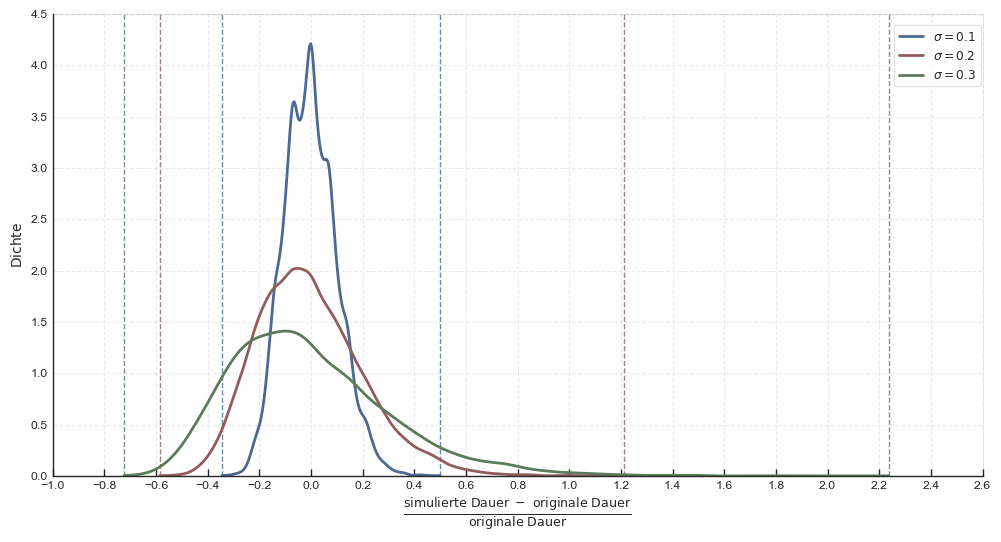

In [8]:
SimulationDataVisualization.set_latex_style(mono=True)

fig = SimulationDataVisualization.plot_relative_deviation_kde(
    df_jobs,
    sigmas=[0.1, 0.2, 0.3],
    x_min=-1, x_max=2.6, x_step=0.2,
    x_font_size = 13, y_max = 4.5
)

file_path = get_data_path("output", "sim_sigma_plot_Dichte_relative", as_string=True)
SimulationDataVisualization.set_latex_style(mono=False)

fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png")

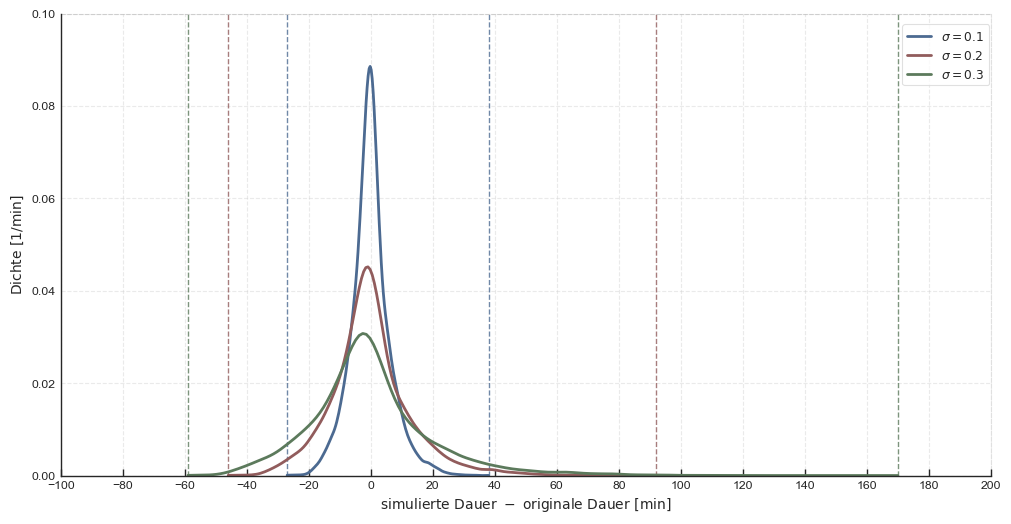

In [9]:
SimulationDataVisualization.set_latex_style(mono=False)
fig = SimulationDataVisualization.plot_absolute_deviation_kde(
    df_jobs,
    sigmas=[0.1, 0.2, 0.3], x_min = - 100, x_max = 200, x_step = 20, y_max = 0.1
)

file_path = get_data_path("output", "sim_sigma_plot_Dichte", as_string=True)
SimulationDataVisualization.set_latex_style(mono=False)

fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png")

In [10]:
#df_jobs = SimulationDataVisualization.make_jobs_dataframe(jobs)
#df_jobs

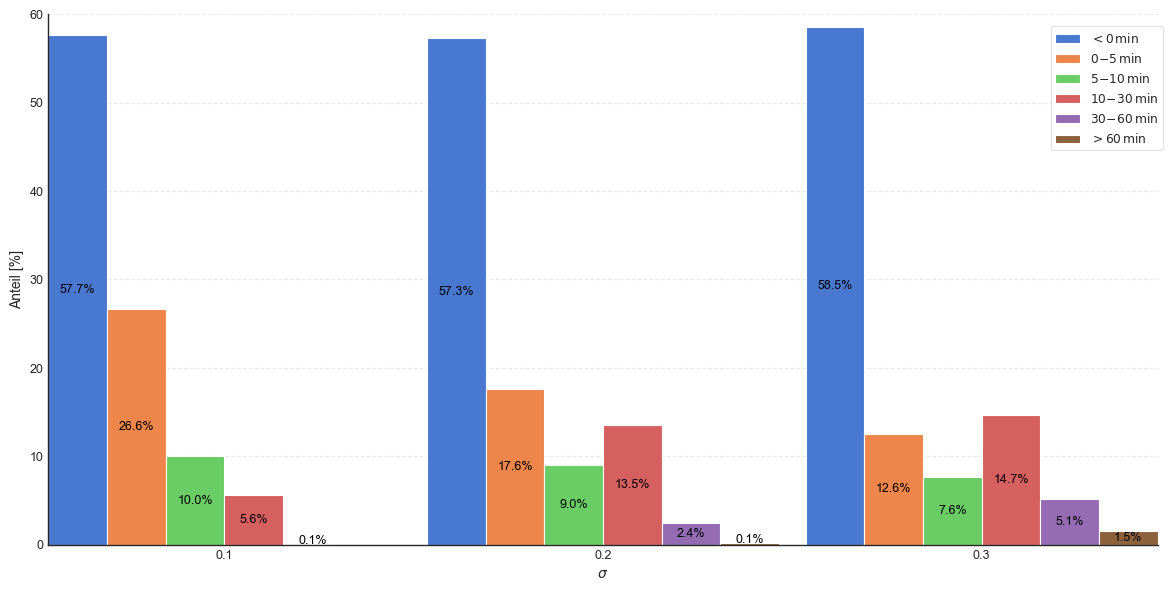

In [11]:
SimulationDataVisualization.set_latex_style(axis_grid = "y")
fig = SimulationDataVisualization.plot_deviation_sigma_summary(df_jobs, sigmas=[0.1, 0.2, 0.3], with_negative = True, y_max= 60)
file_path = get_data_path("output", "sim_sigma_plot_Anteil", as_string=True)
fig.savefig(file_path +".pdf", format="pdf")
fig.savefig(file_path +".png", format="png")
plt.show()


In [12]:
mpl.rcdefaults()